In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import pandas as pd
from datasets import load_dataset, Dataset
import huggingface_hub
from datasets_sql import query
from collections import defaultdict
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import OrderedDict
from networkx.algorithms import bipartite
%matplotlib inline

# Model Cards Tracker

## load data

In [5]:
csv_file = 'csv_file/Models and Model Cards Tracker - HF Models.csv'
csv_data = pd.read_csv(csv_file)
tracker_df = pd.DataFrame(csv_data)
# tracker_df

In [6]:
merged = tracker_df.query('Notes == ["Merged "]')
len(merged)

36

In [7]:
model_merged = merged['model_id'].tolist()
# model_merged

# Download Trends

In [33]:
def to_int(x):
    try:
        return int(x)
    except:
        x = x.replace(',', '')
        return int(x)

def change_title(x):
    x = x.replace(' › Sum of count', '')
    return x

## Load data file

In [34]:
csv_file = "csv_file/config_files_top200_mc.csv"
csv_data = pd.read_csv(csv_file)
csv_df = pd.DataFrame(csv_data)
csv_df = csv_df.fillna(0)
times = csv_df.keys()
times = times[1:]
times = list(map(change_title, times))
csv_df.columns = ['model'] + times
for i in times:
    csv_df[i] = csv_df[i].apply(to_int)
# csv_df

## Downloads Tracker

In [35]:
merged_downloads = csv_df.query('model in @model_merged')
len(merged_downloads)

16

## downloads tracker and downloads

In [36]:
total = []
for i in times:
    total.append(merged_downloads[i].sum())
total_merged_downloads = pd.DataFrame([total], columns=times)
pd.set_option('display.max_columns', None)
total_merged_downloads

,2022-04-25,2022-05-02,2022-05-09,2022-05-16,2022-05-23,2022-05-30,2022-06-06,2022-06-13,2022-06-20,2022-06-27,2022-07-04,2022-07-11,2022-07-18,2022-07-25,2022-08-01,2022-08-08,2022-08-15
0,510368,7163267,6812429,5534889,5390523,4808795,4345685,7145420,5361291,2638333,4844654,4860010,7319733,6502031,4303895,3975901,1670429


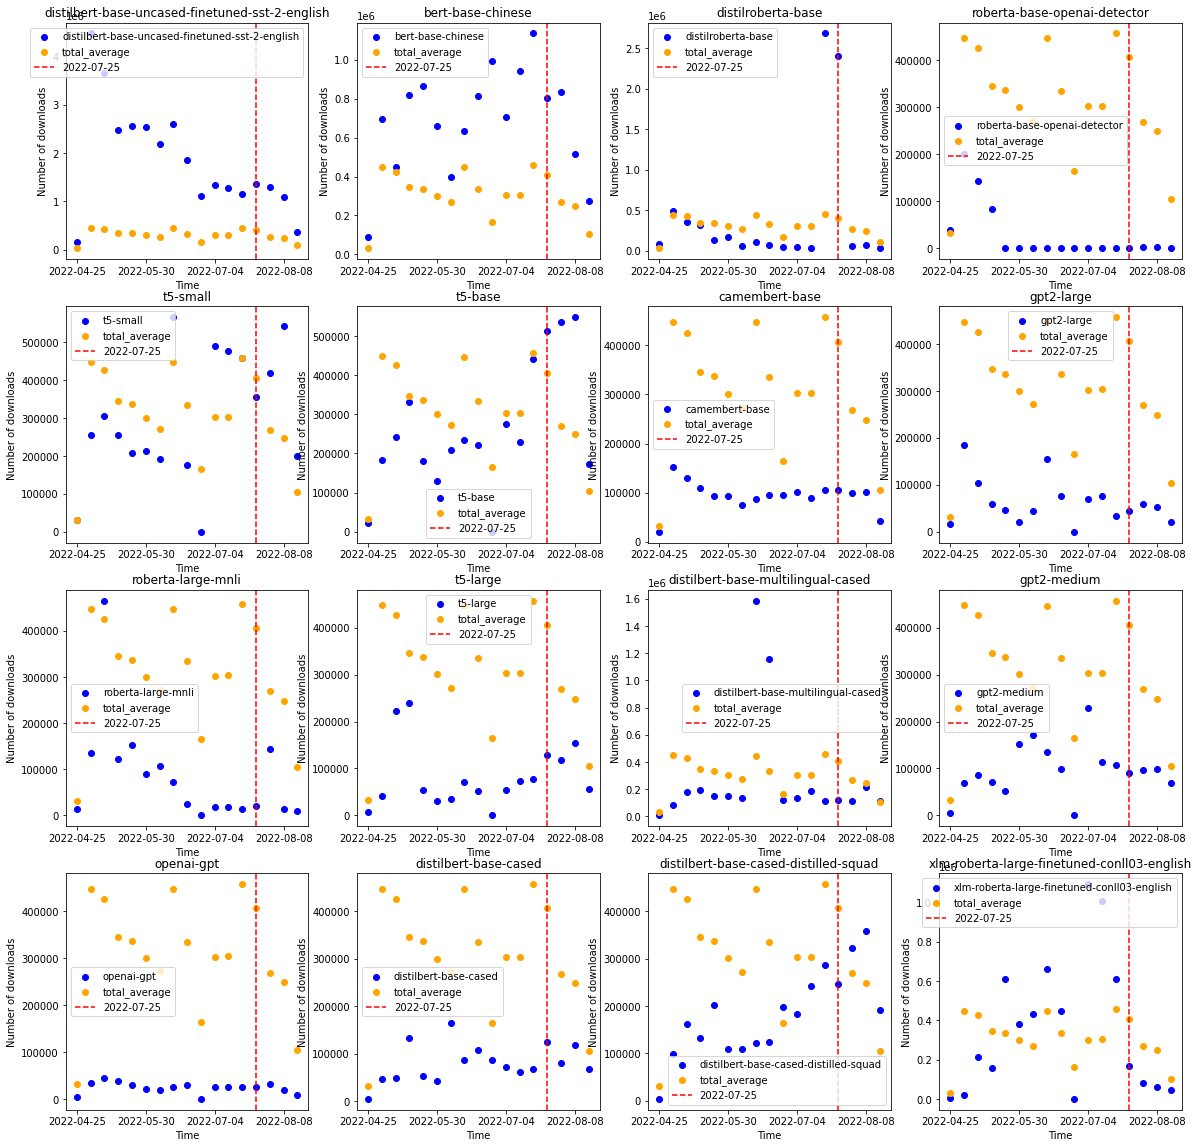

In [43]:
plt.figure(figsize=(20, 20))

for i in range(len(merged_downloads)):
    plt.subplot(4, 4, i+1)
    plt.scatter(times, merged_downloads.iloc[i, 1:], color='blue', label=merged_downloads.iloc[i, 0])
    plt.scatter(times, total_merged_downloads.iloc[0, :]/len(merged_downloads), color='orange', label='total_average')
    plt.title(merged_downloads.iloc[i, 0])
    plt.xlabel('Time')
    plt.ylabel('Number of downloads')
    plt.xticks(times[::5])
    plt.axvline(x = '2022-07-25', color = 'red', linestyle = '--', label = '2022-07-25')
    plt.legend()

plt.show()

## distilgpt2 model

In [44]:
distilgpt2_increase = csv_df.query('model == ["distilgpt2"]')
distilgpt2_increase

,model,2022-04-25,2022-05-02,2022-05-09,2022-05-16,2022-05-23,2022-05-30,2022-06-06,2022-06-13,2022-06-20,2022-06-27,2022-07-04,2022-07-11,2022-07-18,2022-07-25,2022-08-01,2022-08-08,2022-08-15
1,distilgpt2,932585,6834550,7261994,4664604,2214301,3756453,1454858,1640416,1172059,966762,1081917,905253,714414,1719817,894046,762099,338053


In [45]:
distilgpt2_total = distilgpt2_increase.copy()
for i in range(len(distilgpt2_total)):
    distilgpt2_total.iloc[i, 1:] = np.cumsum(np.array(distilgpt2_total.iloc[i, 1:]))
distilgpt2 = pd.concat([distilgpt2_increase, distilgpt2_total], ignore_index=True)
distilgpt2

,model,2022-04-25,2022-05-02,2022-05-09,2022-05-16,2022-05-23,2022-05-30,2022-06-06,2022-06-13,2022-06-20,2022-06-27,2022-07-04,2022-07-11,2022-07-18,2022-07-25,2022-08-01,2022-08-08,2022-08-15
0,distilgpt2,932585,6834550,7261994,4664604,2214301,3756453,1454858,1640416,1172059,966762,1081917,905253,714414,1719817,894046,762099,338053
1,distilgpt2,932585,7767135,15029129,19693733,21908034,25664487,27119345,28759761,29931820,30898582,31980499,32885752,33600166,35319983,36214029,36976128,37314181


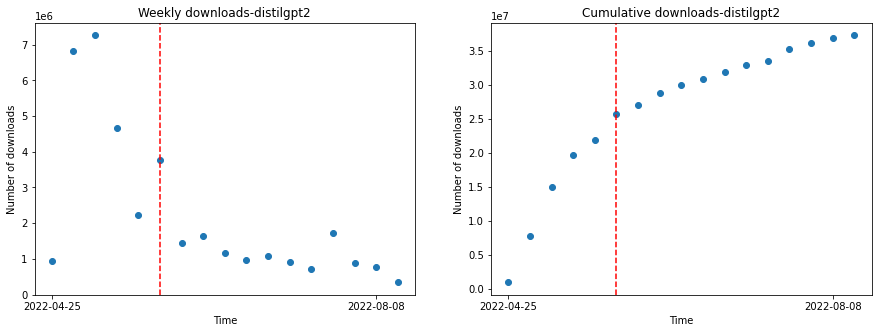

In [46]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(times, distilgpt2_increase.iloc[0, 1:])
plt.xlabel('Time')
plt.ylabel('Number of downloads')
plt.title('Weekly downloads-distilgpt2')
plt.xticks(times[::15])
plt.axvline(x = '2022-05-30', color = 'red', linestyle = '--')


plt.subplot(1, 2, 2)
plt.scatter(times, distilgpt2_total.iloc[0, 1:])
plt.xlabel('Time')
plt.ylabel('Number of downloads')
plt.title('Cumulative downloads-distilgpt2')
plt.xticks(times[::15])
plt.axvline(x = '2022-05-30', color = 'red', linestyle = '--')

plt.show()

## bert-base-cased-squad2, roberta-base-squad2, xlm-roberta-base-squad2

In [47]:
bert_base_cased_squad2 = csv_df.query('model == ["deepset/bert-base-cased-squad2"]')
roberta_base_squad2 = csv_df.query('model == ["deepset/roberta-base-squad2"]')
xlm_base_cased_squad2 = csv_df.query('model == ["deepset/xlm-roberta-base-squad2"]')
squad2_increase = pd.concat([bert_base_cased_squad2, roberta_base_squad2, xlm_base_cased_squad2], ignore_index=True)
squad2_increase

,model,2022-04-25,2022-05-02,2022-05-09,2022-05-16,2022-05-23,2022-05-30,2022-06-06,2022-06-13,2022-06-20,2022-06-27,2022-07-04,2022-07-11,2022-07-18,2022-07-25,2022-08-01,2022-08-08,2022-08-15
0,deepset/roberta-base-squad2,43241,329754,299869,258734,268840,216752,195691,249003,224195,262905,265108,227678,312970,279181,2654229,378343,328467


## Note: config file does not contain bert-base-cased-squad2 and xlm-roberta-base-squad2, do not run this

In [18]:
squad2_total = squad2_increase.copy()
for i in range(len(squad2_total)):
    data = squad2_total.iloc[i, 1:]
    squad2_total.iloc[i, 1:] = np.cumsum(np.array(data))
squad2_total

,model,2021-03-29,2021-04-05,2021-04-12,2021-04-19,2021-04-26,2021-05-03,2021-05-10,2021-05-17,2021-05-24,2021-05-31,2021-06-07,2021-06-14,2021-06-21,2021-06-28,2021-07-05,2021-07-12,2021-07-19,2021-07-26,2021-08-02,2021-08-09,2021-08-16,2021-08-23,2021-08-30,2021-09-06,2021-09-13,2021-09-20,2021-09-27,2021-10-04,2021-10-11,2021-10-18,2021-10-25,2021-11-01,2021-11-08,2021-11-15,2021-11-22,2021-11-29,2021-12-06,2021-12-13,2021-12-20,2021-12-27,2022-01-03,2022-01-10,2022-01-17,2022-01-24,2022-01-31,2022-02-07,2022-02-14,2022-02-21,2022-02-28,2022-03-07,2022-03-14,2022-03-21,2022-03-28,2022-04-04,2022-04-11,2022-04-18,2022-04-25,2022-05-02,2022-05-09,2022-05-16,2022-05-23,2022-05-30,2022-06-06,2022-06-13,2022-06-20,2022-06-27,2022-07-04,2022-07-11,2022-07-18,2022-07-25,2022-08-01,2022-08-08
0,deepset/bert-base-cased-squad2,0,257,257,257,257,962,962,1928,2177,2501,2501,2501,2501,2501,2501,2501,4680,6523,6523,8053,11157,14042,15571,17205,17205,17205,17205,17205,17205,17205,17205,17205,17205,17205,17205,17219,17219,17219,17219,17219,17219,17219,17219,17219,17219,17219,17219,17219,17219,17219,17219,17219,17219,20136,20136,20136,20136,20136,24333,24333,24333,27856,33000,33000,33000,35028,35028,35028,35028,35028,35028,37410
1,deepset/roberta-base-squad2,0,508,1042,2063,3052,3927,5567,7112,7723,8505,11899,16026,23016,29286,35088,40190,44880,55873,73504,91096,110606,136881,163752,191132,216585,254080,280741,302994,318372,335143,376083,431610,485669,539459,592140,592501,638119,685731,729507,763316,807504,871535,924331,953502,1004667,1038182,1072318,1111643,1160444,1197775,1242193,1282876,1317415,1357171,1391472,1424683,1462960,1498333,1534894,1564319,1591076,1610084,1633467,1666594,1698115,1733042,1765620,1797706,1833917,1868126,1953000,1979996
2,deepset/xlm-roberta-base-squad2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2062,2062,2062,2062,2062,2062,12449


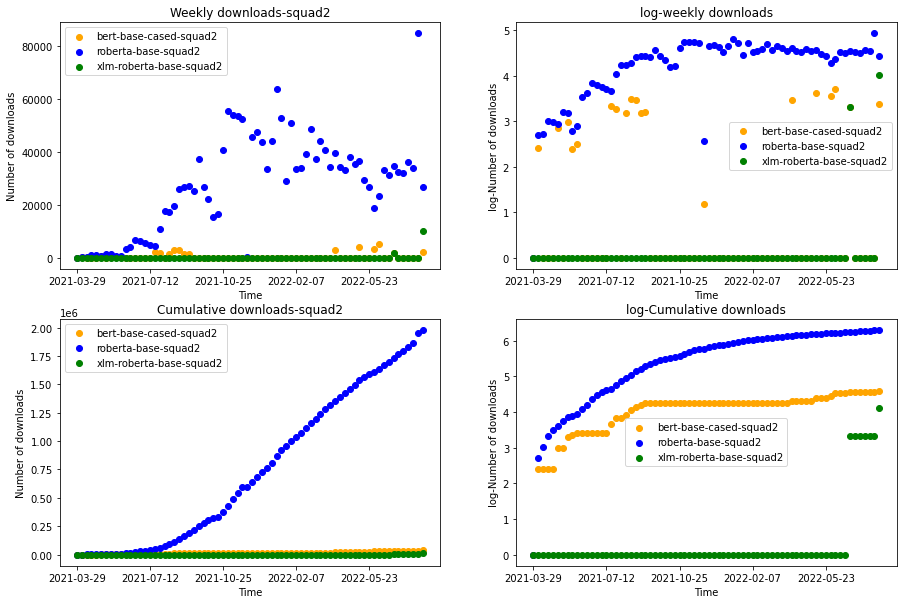

In [19]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.scatter(times, squad2_increase.iloc[0, 1:], color = 'orange', label = 'bert-base-cased-squad2')
plt.scatter(times, squad2_increase.iloc[1, 1:], color = 'blue', label = 'roberta-base-squad2')
plt.scatter(times, squad2_increase.iloc[2, 1:], color = 'green', label = 'xlm-roberta-base-squad2')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of downloads')
plt.title('Weekly downloads-squad2')
plt.xticks(times[::15])

plt.subplot(2, 2, 2)
plt.scatter(times, np.log10(squad2_increase.iloc[0, 1:].to_numpy(dtype='float32') + 1), color = 'orange', label = 'bert-base-cased-squad2')
plt.scatter(times, np.log10(squad2_increase.iloc[1, 1:].to_numpy(dtype='float32') + 1), color = 'blue', label = 'roberta-base-squad2')
plt.scatter(times, np.log10(squad2_increase.iloc[2, 1:].to_numpy(dtype='float32') + 1), color = 'green', label = 'xlm-roberta-base-squad2')
plt.legend()
plt.xlabel('Time')
plt.ylabel('log-Number of downloads')
plt.title('log-weekly downloads')
plt.xticks(times[::15])

plt.subplot(2, 2, 3)
plt.scatter(times, squad2_total.iloc[0, 1:], color = 'orange', label = 'bert-base-cased-squad2')
plt.scatter(times, squad2_total.iloc[1, 1:], color = 'blue', label = 'roberta-base-squad2')
plt.scatter(times, squad2_total.iloc[2, 1:], color = 'green', label = 'xlm-roberta-base-squad2')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of downloads')
plt.title('Cumulative downloads-squad2')
plt.xticks(times[::15])

plt.subplot(2, 2, 4)
plt.scatter(times, np.log10(squad2_total.iloc[0, 1:].to_numpy(dtype='float32') + 1), color = 'orange', label = 'bert-base-cased-squad2')
plt.scatter(times, np.log10(squad2_total.iloc[1, 1:].to_numpy(dtype='float32') + 1), color = 'blue', label = 'roberta-base-squad2')
plt.scatter(times, np.log10(squad2_total.iloc[2, 1:].to_numpy(dtype='float32') + 1), color = 'green', label = 'xlm-roberta-base-squad2')
plt.legend()
plt.xlabel('Time')
plt.ylabel('log-Number of downloads')
plt.title('log-Cumulative downloads')
plt.xticks(times[::15])

plt.show()

## bert-base-uncased and roberta-base

In [48]:
bert_base_uncased = csv_df.query('model == ["bert-base-uncased"]')
roberta = csv_df.query('model == ["roberta-base"]')
distilbert_base_uncased = csv_df.query('model == ["distilbert-base-uncased"]')
b_r_increase = pd.concat([bert_base_uncased, roberta, distilbert_base_uncased], ignore_index=True)
b_r_increase

,model,2022-04-25,2022-05-02,2022-05-09,2022-05-16,2022-05-23,2022-05-30,2022-06-06,2022-06-13,2022-06-20,2022-06-27,2022-07-04,2022-07-11,2022-07-18,2022-07-25,2022-08-01,2022-08-08,2022-08-15
0,bert-base-uncased,687513,4879297,4292176,4182278,3774209,3327406,3576550,5289579,6783964,4814196,4531854,4751169,5568426,5801624,5647682,8263023,3746662
1,roberta-base,392061,3112067,3149292,2718978,1358206,1522516,1393212,1963743,1548025,0,2470600,1760534,2108038,1250468,1486023,1668745,2170936
2,distilbert-base-uncased,156633,1438742,1904620,2065082,1500552,1393858,2629910,1949114,1815085,2049406,3456181,1855312,2666747,2982181,2606513,1733625,1022375


In [49]:
b_r_total = b_r_increase.copy()
for i in range(len(b_r_total)):
    data = b_r_total.iloc[i, 1:].to_list()
    data = list(map(to_int, data))
    b_r_increase.iloc[i, 1:] = data
    b_r_total.iloc[i, 1:] = np.cumsum(np.array(data))
b_r_total

,model,2022-04-25,2022-05-02,2022-05-09,2022-05-16,2022-05-23,2022-05-30,2022-06-06,2022-06-13,2022-06-20,2022-06-27,2022-07-04,2022-07-11,2022-07-18,2022-07-25,2022-08-01,2022-08-08,2022-08-15
0,bert-base-uncased,687513,5566810,9858986,14041264,17815473,21142879,24719429,30009008,36792972,41607168,46139022,50890191,56458617,62260241,67907923,76170946,79917608
1,roberta-base,392061,3504128,6653420,9372398,10730604,12253120,13646332,15610075,17158100,17158100,19628700,21389234,23497272,24747740,26233763,27902508,30073444
2,distilbert-base-uncased,156633,1595375,3499995,5565077,7065629,8459487,11089397,13038511,14853596,16903002,20359183,22214495,24881242,27863423,30469936,32203561,33225936


In [50]:
b_r_increase

,model,2022-04-25,2022-05-02,2022-05-09,2022-05-16,2022-05-23,2022-05-30,2022-06-06,2022-06-13,2022-06-20,2022-06-27,2022-07-04,2022-07-11,2022-07-18,2022-07-25,2022-08-01,2022-08-08,2022-08-15
0,bert-base-uncased,687513,4879297,4292176,4182278,3774209,3327406,3576550,5289579,6783964,4814196,4531854,4751169,5568426,5801624,5647682,8263023,3746662
1,roberta-base,392061,3112067,3149292,2718978,1358206,1522516,1393212,1963743,1548025,0,2470600,1760534,2108038,1250468,1486023,1668745,2170936
2,distilbert-base-uncased,156633,1438742,1904620,2065082,1500552,1393858,2629910,1949114,1815085,2049406,3456181,1855312,2666747,2982181,2606513,1733625,1022375


/tmp/ipykernel_125235/3606985714.py:14: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(times, np.log10(b_r_increase.iloc[1, 1:].to_numpy(dtype ='float32')), color = 'blue', label = 'roberta-base')


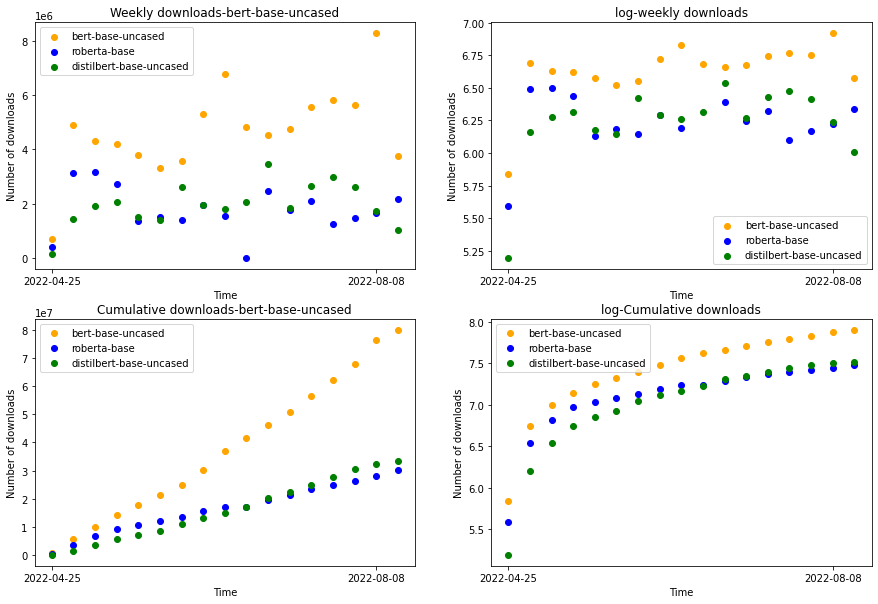

In [53]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.scatter(times, b_r_increase.iloc[0, 1:], color = 'orange', label = 'bert-base-uncased')
plt.scatter(times, b_r_increase.iloc[1, 1:], color = 'blue', label = 'roberta-base')
plt.scatter(times, b_r_increase.iloc[2, 1:], color = 'green', label = 'distilbert-base-uncased')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of downloads')
plt.title('Weekly downloads-bert-base-uncased')
plt.xticks(times[::15])

plt.subplot(2, 2, 2)
plt.scatter(times, np.log10(b_r_increase.iloc[0, 1:].to_numpy(dtype ='float32')), color = 'orange', label = 'bert-base-uncased')
plt.scatter(times, np.log10(b_r_increase.iloc[1, 1:].to_numpy(dtype ='float32')), color = 'blue', label = 'roberta-base')
plt.scatter(times, np.log10(b_r_increase.iloc[2, 1:].to_numpy(dtype ='float32')), color = 'green', label = 'distilbert-base-uncased')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of downloads')
plt.title('log-weekly downloads')
plt.xticks(times[::15])

plt.subplot(2, 2, 3)
plt.scatter(times, b_r_total.iloc[0, 1:], color = 'orange', label = 'bert-base-uncased')
plt.scatter(times, b_r_total.iloc[1, 1:], color = 'blue', label = 'roberta-base')
plt.scatter(times, b_r_total.iloc[2, 1:], color = 'green', label = 'distilbert-base-uncased')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of downloads')
plt.title('Cumulative downloads-bert-base-uncased')
plt.xticks(times[::15])

plt.subplot(2, 2, 4)
plt.scatter(times, np.log10(b_r_total.iloc[0, 1:].to_numpy(dtype ='float32')), color = 'orange', label = 'bert-base-uncased')
plt.scatter(times, np.log10(b_r_total.iloc[1, 1:].to_numpy(dtype ='float32')), color = 'blue', label = 'roberta-base')
plt.scatter(times, np.log10(b_r_total.iloc[2, 1:].to_numpy(dtype ='float32')), color = 'green', label = 'distilbert-base-uncased')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of downloads')
plt.title('log-Cumulative downloads')
plt.xticks(times[::15])

plt.show()

## total downloads

In [54]:
times = csv_df.keys()
times = times[1:]
# print(times)
total = []
for i in times:
    csv_df[i] = list(map(to_int, csv_df[i]))
    total.append(csv_df[i].sum())
times = list(map(change_title, times))
increase_data = pd.DataFrame([total], columns=times)
# print(increase_data)
total_data = pd.DataFrame([np.cumsum(np.array([total]))], columns=times)
total_data
pd.concat([increase_data, total_data], axis=0, ignore_index=True)

,2022-04-25,2022-05-02,2022-05-09,2022-05-16,2022-05-23,2022-05-30,2022-06-06,2022-06-13,2022-06-20,2022-06-27,2022-07-04,2022-07-11,2022-07-18,2022-07-25,2022-08-01,2022-08-08,2022-08-15
0,16331682,84444014,49434572,48743907,45437993,41173362,39477532,49369831,39475789,22029490,42435804,81082336,54236904,54528201,45840759,43402464,26754266
1,16331682,100775696,150210268,198954175,244392168,285565530,325043062,374412893,413888682,435918172,478353976,559436312,613673216,668201417,714042176,757444640,784198906


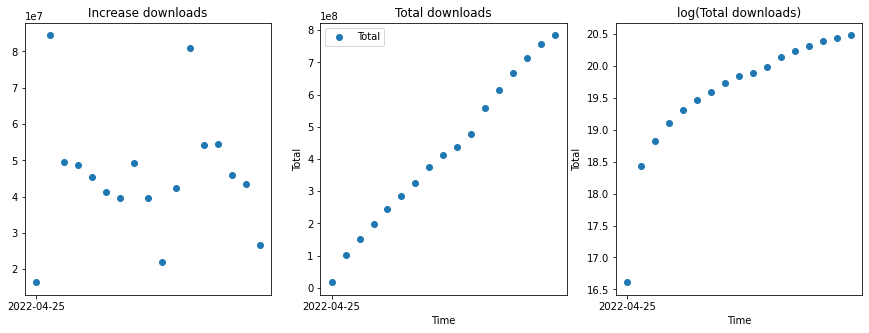

In [55]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(times, increase_data)
plt.xticks(times[::20])
plt.title('Increase downloads')

plt.subplot(1, 3, 2)
plt.scatter(times, total_data)
plt.xticks(times[::20])
plt.legend(['Total', 'Increase', 'log(Total)'])

plt.xlabel('Time')
plt.ylabel('Total')
plt.title('Total downloads')

plt.subplot(1, 3, 3)
plt.scatter(times, np.log(np.array(total_data).tolist()))
plt.xticks(times[::20])
plt.xlabel('Time')
plt.ylabel('Total')
plt.title('log(Total downloads)')

# plt.savefig('total_downloads.png')
plt.show()



# Model Card Info Analysis

## Load Models 

In [3]:
models = pickle.load(open('pkl_file/models.pkl', 'rb'))
model_card = pickle.load(open('pkl_file/model_card_0and0up.pkl', 'rb'))
print(len(models))
print(len(model_card))
for m in model_card.keys():
    print(m)
    break
print(list(model_card.keys())[-1].downloads)

64115
31358
Model Name: microsoft/deberta-base, Tags: ['pytorch', 'tf', 'rust', 'deberta', 'en', 'arxiv:2006.03654', 'transformers', 'deberta-v1', 'license:mit']
0


## Structured Information

In [4]:
selected_models = []
for m in models:
    if hasattr(m, 'cardData') and type(m.cardData) == dict:
        # if hasattr(m, 'downloads') and m.downloads > 0 and m.downloads is not None:
        selected_models.append(m)
print('Selected models: ', len(selected_models))
selected_model_name = [m.modelId for m in selected_models]

Selected models:  31534


In [5]:
models_has_card = {m : c for m, c in model_card.items() if m.modelId in selected_model_name}
print(len(models_has_card))

31358


## Load cardData

In [21]:
import re
def count_word(s):
    regular = re.compile(r'[a-zA-Z]+://[^\s]*[.com|.cn]')
    s = re.sub(regular, 'website', s)
    s = str(s).replace('/', '').replace('-', '')
    s = re.sub(r'[^\w\s]',' ', s)
    return len(s.split())

In [11]:
model_cardData = [model.cardData for model in models_has_card.keys()]
print(len(model_cardData))

31358


In [7]:
meta_attr = []
for i in models_has_card.keys():
    meta_attr.extend(i.cardData.keys())
print(len(meta_attr))

78942


In [8]:
# count the number of each meta attribute
from collections import Counter
c = Counter(meta_attr)
print(c)

Counter({'tags': 19523, 'license': 14743, 'language': 11184, 'datasets': 9809, 'model-index': 8348, 'metrics': 4992, 'widget': 4747, 'thumbnail': 2122, 'pipeline_tag': 1081, 'library_name': 798, 'inference': 584, 'co2_eq_emissions': 462, 'model_index': 187, 'mask_token': 48, 'task': 35, 'library_tag': 34, 'licenses': 25, 'tasks': 23, 'dataset': 12, 'commercial': 11, 'task_ids': 10, 'parameters': 10, 'multilinguality': 9, 'task_categories': 8, 'languages': 8, 'widgets': 7, 'results': 7, 'annotations_creators': 6, 'language_details': 5, 'pipeline': 5, 'language_creators': 5, 'pretty_name': 5, 'source_datasets': 5, 'size_categories': 5, 'tag': 4, 'library': 4, 'title': 4, 'emoji': 4, 'colorFrom': 4, 'colorTo': 4, 'sdk': 4, 'pinned': 4, 'language_bcp47': 3, 'pipeline-tag': 3, 'other': 3, 'mask-token': 2, 'liscence': 2, 'model': 2, '<!-- thumbnail': 2, 'model_creators': 2, 'metric': 2, 'xdatasets': 2, 'licence': 2, 'lang': 2, 'app_file': 2, 'version': 2, 'train-eval-index': 1, 'programming_

In [9]:
meta = {'language': [c['language'] for c in model_cardData if 'language' in c and c['language'] != None],
        'license': [c['license'] for c in model_cardData if 'license' in c and c['license'] != None] ,
        'tags': [c['tags'] for c in model_cardData if 'tags' in c and c['tags'] is not None],
        'datasets': [c['datasets'] for c in model_cardData if 'datasets' in c and c['datasets'] is not None],
        }
for i in meta.keys():
        print(i, len(meta[i]))

language 11180
license 14732
tags 19506
datasets 9782


## Regularize cardData

In [26]:
def regularize(l):
    if type(l) == str:
        return l.replace('[', '').replace(']', '')
    elif type(l) == list:
        return ' '.join([i for i in l if i != None and type(i) == str])

meta = {k: list(filter(None, list(map(regularize, v)))) for k, v in meta.items()}    

{'language': ['en',
  'en',
  'zh',
  'fr',
  'en',
  'en',
  'en',
  'multilingual af am ar as az be bg bn br bs ca cs cy da de el en eo es et eu fa fi fr fy ga gd gl gu ha he hi hr hu hy id is it ja jv ka kk km kn ko ku ky la lo lt lv mg mk ml mn mr ms my ne nl no om or pa pl ps pt ro ru sa sd si sk sl so sq sr su sv sw ta te th tl tr ug uk ur uz vi xh yi zh',
  'en',
  'en',
  'en',
  'en',
  'zh',
  'en',
  'en',
  'en',
  'en',
  'multilingual af sq ar an hy ast az ba eu bar be bn inc bs br bg my ca ceb ce zh cv hr cs da nl en et fi fr gl ka de el gu ht he hi hu is io id ga it ja jv kn kk ky ko la lv lt roa nds lm mk mg ms ml mr mn min ne new nb nn oc fa pms pl pt pa ro ru sco sr hr scn sk sl aze es su sw sv tl tg th ta tt te tr uk ud uz vi vo war cy fry pnb yo',
  'en',
  'en',
  'en fr ro de',
  'en fr ro de',
  'multilingual af am ar as az be bg bn br bs ca cs cy da de el en eo es et eu fa fi fr fy ga gd gl gu ha he hi hr hu hy id is it ja jv ka kk km kn ko ku ky la lo lt lv mg

## Visualize and Count distribution of each meta attribute

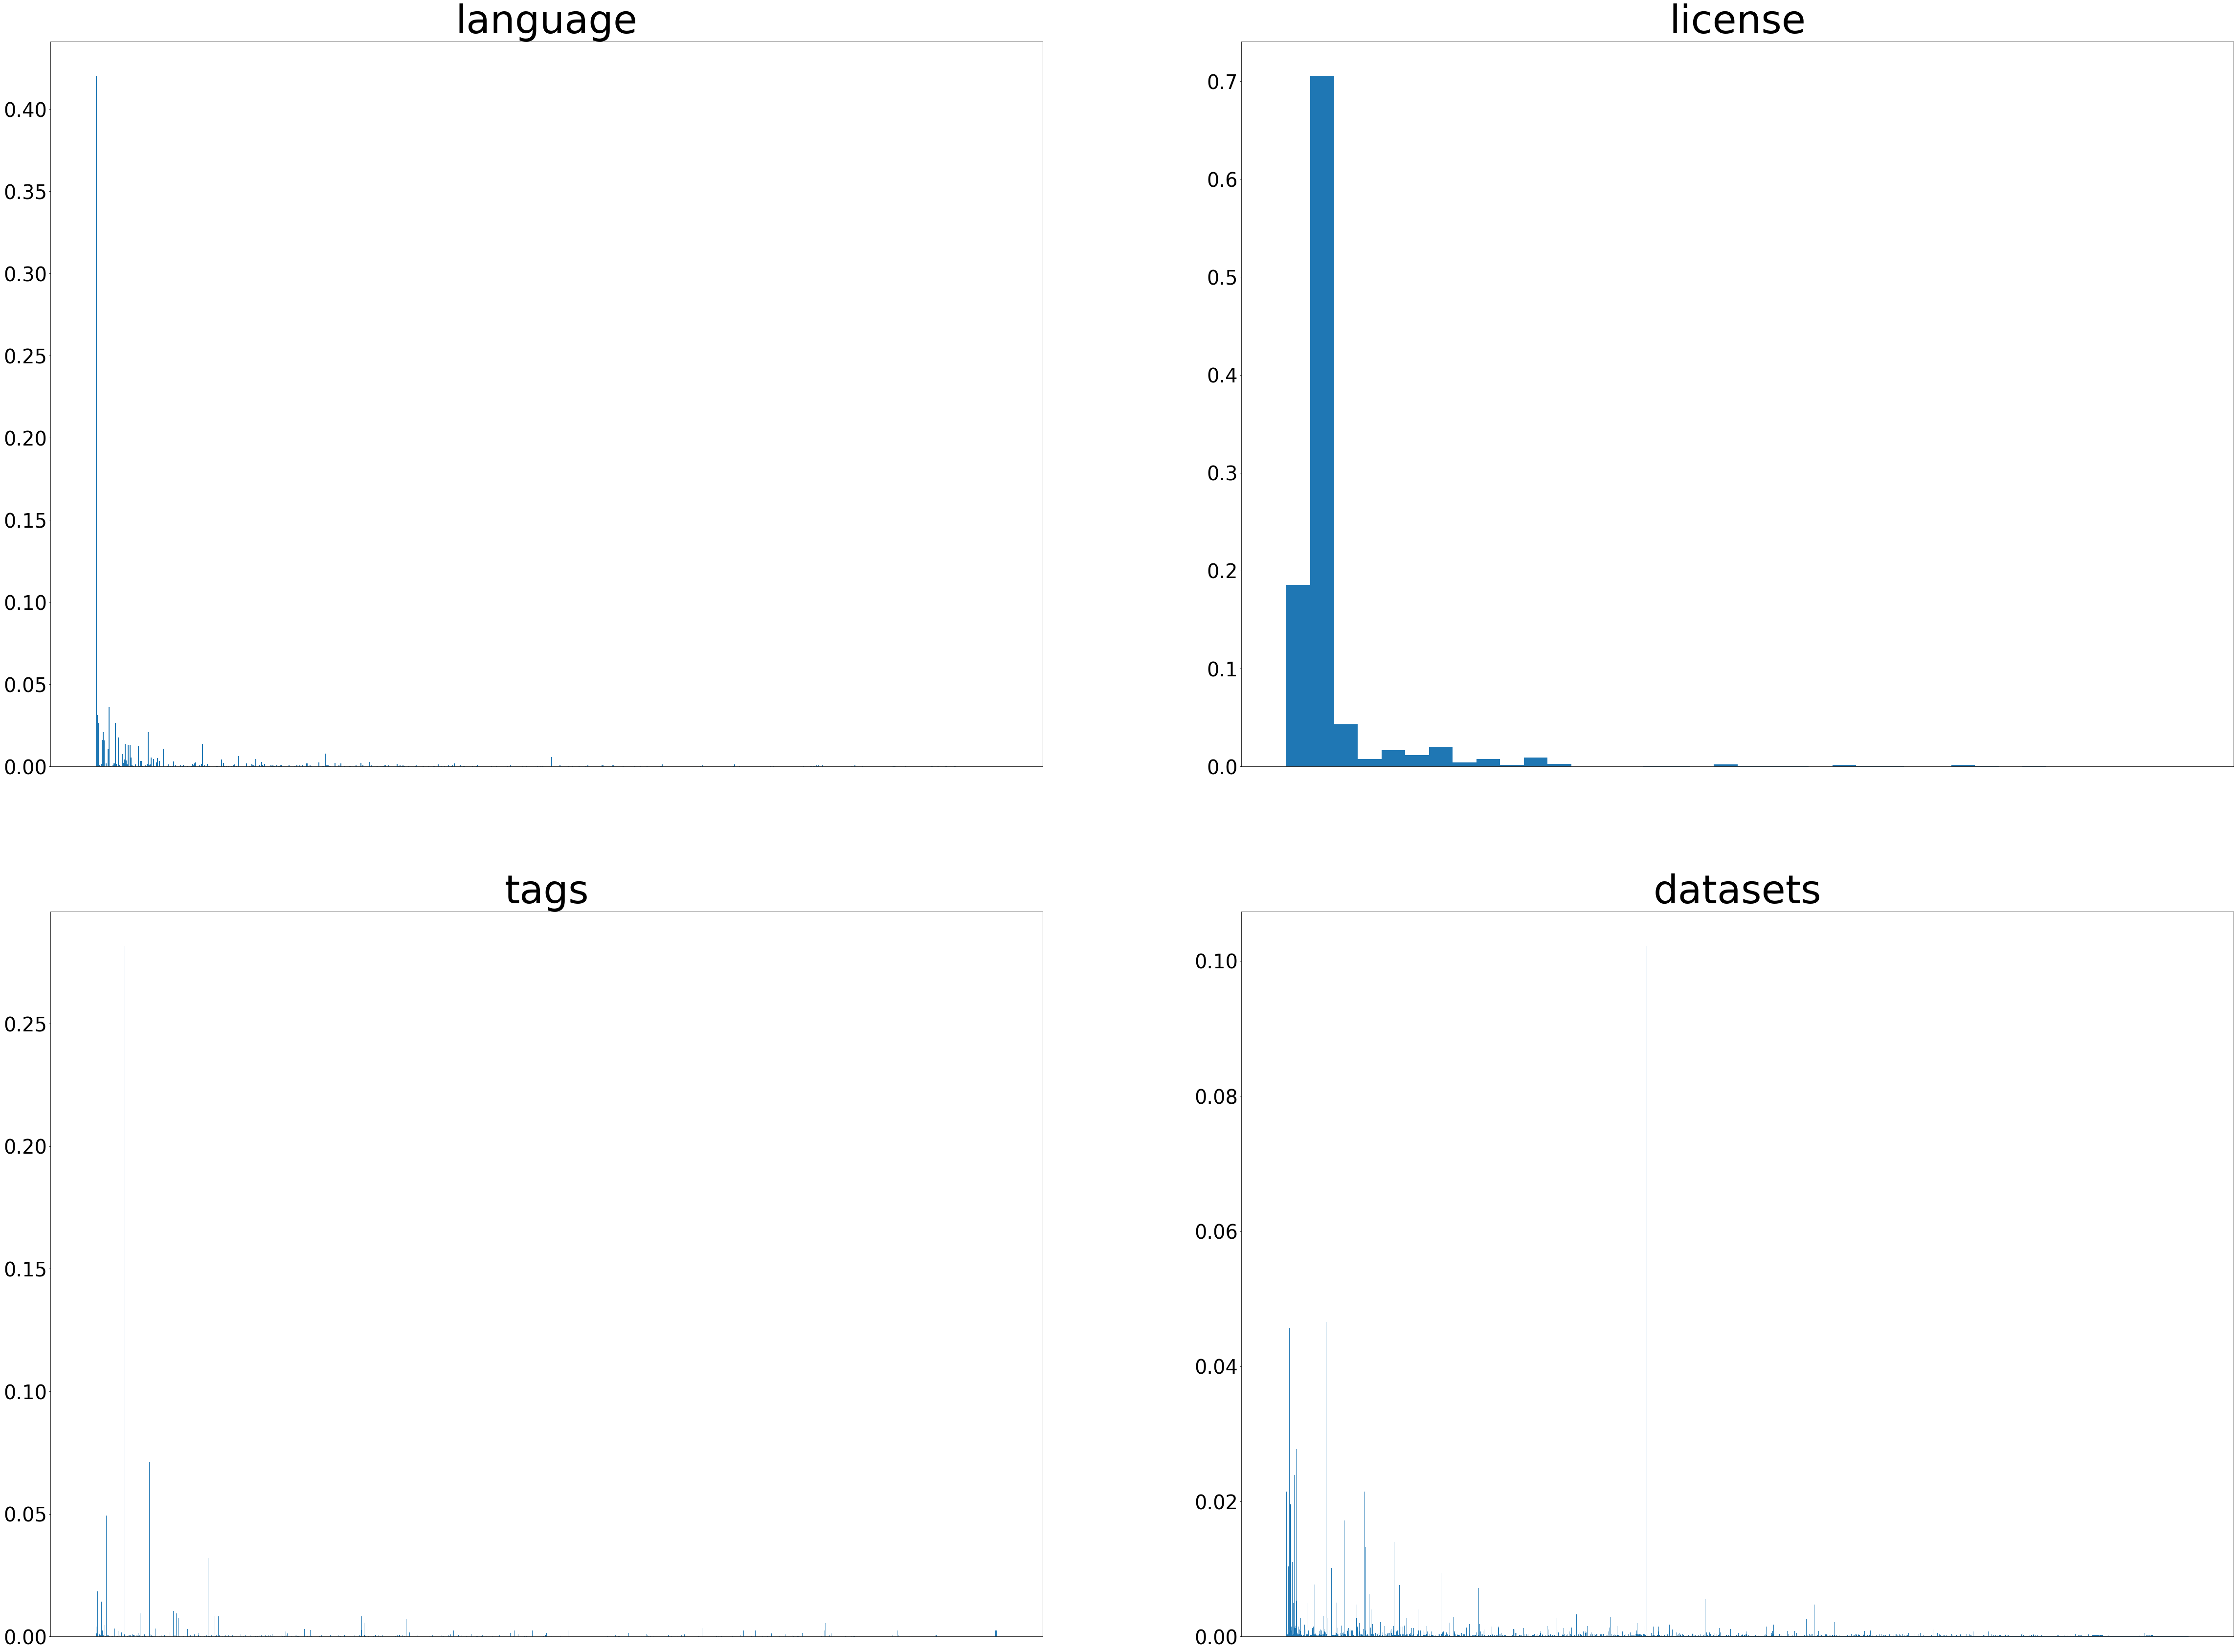

In [27]:
index = 1
plt.figure(figsize=(80,60))
for i in meta.keys():
    plt.subplot(2, 2, index)
    plt.hist(meta[i], density=True, bins=len(set(meta[i])))
    plt.xticks([])
    plt.yticks(fontsize=40)
    plt.title(i, fontsize=80)
    index += 1
# plt.savefig('meta_distribution.jpg', dpi=600)
plt.show()

In [12]:
from collections import Counter
for i in meta.keys():
    counter = Counter(meta[i])
    print(i)
    print(len(Counter(meta[i])))
    print(Counter(meta[i]).most_common(10))


language
899
[('en', 4691), ('es', 404), ('zh', 349), ('fr', 297), ('de', 295), ('ja', 235), ('ar', 233), ('pt', 196), ('ru', 181), ('multilingual', 177)]
license
38
[('apache-2.0', 10118), ('mit', 2662), ('cc-by-4.0', 617), ('cc-by-sa-4.0', 291), ('afl-3.0', 239), ('cc-by-nc-sa-4.0', 170), ('cc-by-nc-4.0', 130), ('gpl-3.0', 110), ('other', 106), ('cc0-1.0', 59)]
tags
2446
[('generated_from_trainer', 5490), ('translation', 1412), ('huggingtweets', 1387), ('conversational', 960), ('generated_from_keras_callback', 625), ('sentence-transformers feature-extraction sentence-similarity transformers', 360), ('summarization', 277), ('autotrain', 205), ('audio automatic-speech-recognition speech xlsr-fine-tuning-week', 185), ('autonlp', 182)]
datasets
1974
[('mozilla-foundation/common_voice_7_0', 995), ('common_voice', 453), ('squad', 445), ('glue', 340), ('emotion', 270), ('conll2003', 233), ('bookcorpus wikipedia', 209), ('xtreme', 209), ('wikipedia', 191), ('c4', 190)]


## Markdown Parsing

In [6]:
import mistune
from mistune.plugins import plugin_table
markdown = mistune.create_markdown(renderer=mistune.AstRenderer(), 
                    plugins=['table', 'url', 'footnotes', 'strikethrough'])

## evaluation and limitation detection

In [7]:
eval_list = ['evaluation', 'evaluate', 'accuracy', 'f1', 'precision', 'exact match',
             'validation']
eval_cnt = 0
model_has_eval = {}
for m, c in models_has_card.items():
    c_text = c.text.lower()
    for i in eval_list:
        if i in c_text:
            model_has_eval[m.id] = model_has_eval.get(m.id, []) + [i]
print(len(model_has_eval))
print(len(model_has_eval) / len(models))

14418
0.22487717382827732


In [8]:
model_has_eval_df = pd.DataFrame(model_has_eval.items(), columns=['modelId', 'evaluation'])
model_has_eval_df.to_csv('model_has_eval.csv', index=True)

In [9]:
limitation_list = ['limitation', 'bias']
model_has_limit = {}
for m, c in models_has_card.items():
    c_text = c.text.lower()
    for i in limitation_list:
        if i in c_text:
            model_has_limit[m.id] = model_has_limit.get(m.id, []) + [i]
print(len(model_has_limit))
print(len(model_has_limit) / len(models))

14031
0.21884114481790531


In [20]:
model_has_eval_df = pd.DataFrame(columns=['modelId', 'evaluation'])

model_has_eval_df.to_csv('model_has_limit.csv', index=True)

## markdown parser detection

In [11]:
def is_head(s):
    return s['type'] == 'heading'

def is_url(s):
    return s['type'] == 'link'

def is_table(s):
    return s['type'] == 'table'

def is_arxiv(s):
    return s['type'] == 'link' and 'arxiv' in s['link']

def is_github(s):
    return s['type'] == 'link' and 'github' in s['link']

def is_twitter(s):
    return s['type'] == 'link' and 'twitter' in s['link']

def is_citation(s):
    if s['type'] == 'block_code' and 'info' in s:
        if s['info'] == None:
            return '@' in s['text']
        info = s['info'].replace(' ', '')
        if info == 'latex' or info == 'bibtex':
            return True
    return False

In [12]:
twitter_link = {}
def has_url(s):
    if is_url(s):
        return True
    elif 'children' in s and s['children'] != None:
        for i in s['children']:
            if not has_url(i):
                continue
            else:
                return True
    else:
        return is_url(s)

def has_table(s):
    if is_table(s):
        return True
    elif 'children' in s and s['children'] != None:
        for i in s['children']:
            if not has_table(i):
                continue
            else:
                return True
    else:
        return is_table(s)

def has_arxiv(s):
    if is_arxiv(s):
        return True
    elif 'children' in s and s['children'] != None:
        for i in s['children']:
            if not has_arxiv(i):
                continue
            else:
                return True
    else:
        return is_arxiv(s)

def has_github(s):
    if is_github(s):
        return True
    elif 'children' in s and s['children'] != None:
        for i in s['children']:
            if not has_github(i):
                continue
            else:
                return True
    else:
        return is_github(s)

def has_twitter(m, s):
    global twitter_link
    if is_twitter(s):
        t = twitter_link.get(m, set())
        t.add(s['link'])
        twitter_link[m] = t
        return True
    elif 'children' in s and s['children'] != None:
        for i in s['children']:
            if not has_twitter(m, i):
                continue
            else:
                return True
    else:
        return is_twitter(s)

## twitter link count

In [13]:
for m in models_has_card.keys():
    c_markdown = markdown(models_has_card[m].text)
    for i in c_markdown:
        if has_twitter(m, i):
            continue
len(twitter_link)

2184

In [14]:
twitter_link_set = set()
for i in twitter_link.values():
    for j in i:
        twitter_link_set.add(j)
len(twitter_link_set)

824

In [18]:
twitter_link_model = {i:[] for i in twitter_link_set}
for i in twitter_link_set:
    for m in twitter_link.keys():
        if i in twitter_link[m]:
            twitter_link_model[i].append(m.modelId)


In [19]:
colums = ['user', 'twitter_link', 'models']

In [20]:
twitter_model_df = pd.DataFrame(columns=colums)
for i in twitter_link_model.keys():
    user = i.split('/')[-1]
    models = ','.join(list(twitter_link_model[i]))
    twitter_model_df.loc[len(twitter_model_df)] = [user, i, models]
# twitter_model_df

,user,twitter_link,models
0,neonacho,https://twitter.com/neonacho,huggingtweets/neonacho
1,gordonramsay,https://twitter.com/gordonramsay,huggingtweets/gordonramsay
2,toriteamos,https://twitter.com/toriteamos,huggingtweets/toriteamos
3,nickjfuentes,https://twitter.com/nickjfuentes,huggingtweets/nickjfuentes
4,malleus_malefix,https://twitter.com/malleus_malefix,huggingtweets/malleus_malefix
...,...,...,...
819,jtk314,https://twitter.com/jtk314,huggingtweets/jtk314
820,clikehouse,https://twitter.com/clikehouse,huggingtweets/clikehouse
821,monopolyfornite,https://twitter.com/monopolyfornite,huggingtweets/monopolyfornite
822,alth0u,https://twitter.com/alth0u,huggingtweets/alth0u


In [22]:
twitter_model_df.to_csv('csv_file/twitter_link_model.csv', index=True)

In [81]:
model_card_markdown = {}
for m, c in models_has_card.items():
    c_markdown = markdown(c.text)
    head_cnt = 0
    has_table_ = 0
    has_url_ = 0
    has_arxiv_ = 0
    has_github_ = 0
    has_citation = 0    
    for i in c_markdown:
        if is_head(i): head_cnt += 1
        if has_table(i): has_table_ = 1
        if has_url(i): has_url_ = 1
        if has_arxiv(i): has_arxiv_ = 1
        if has_github(i): has_github_ = 1
        if is_citation(i): has_citation = 1

    model_card_markdown[m] = {'head_cnt': head_cnt, 
                            'has_table': has_table_,
                            'has_url': has_url_,
                            'has_arxiv': has_arxiv_,
                            'has_github': has_github_,
                            'has_citation': has_citation}
    

## organize data

In [82]:
model_card_markdown_info = list(model_card_markdown.values())[0]
model_card_markdown_info
unstructured_info = list(model_card_markdown_info.keys())
unstructured_info

['head_cnt', 'has_table', 'has_url', 'has_arxiv', 'has_github', 'has_citation']

In [83]:
unstructured_info_dict = {}
for info in unstructured_info:
    unstructured_info_dict[info] = [i[info] for i in model_card_markdown.values()]



## Visualize and Count distribution of cnt if markdown

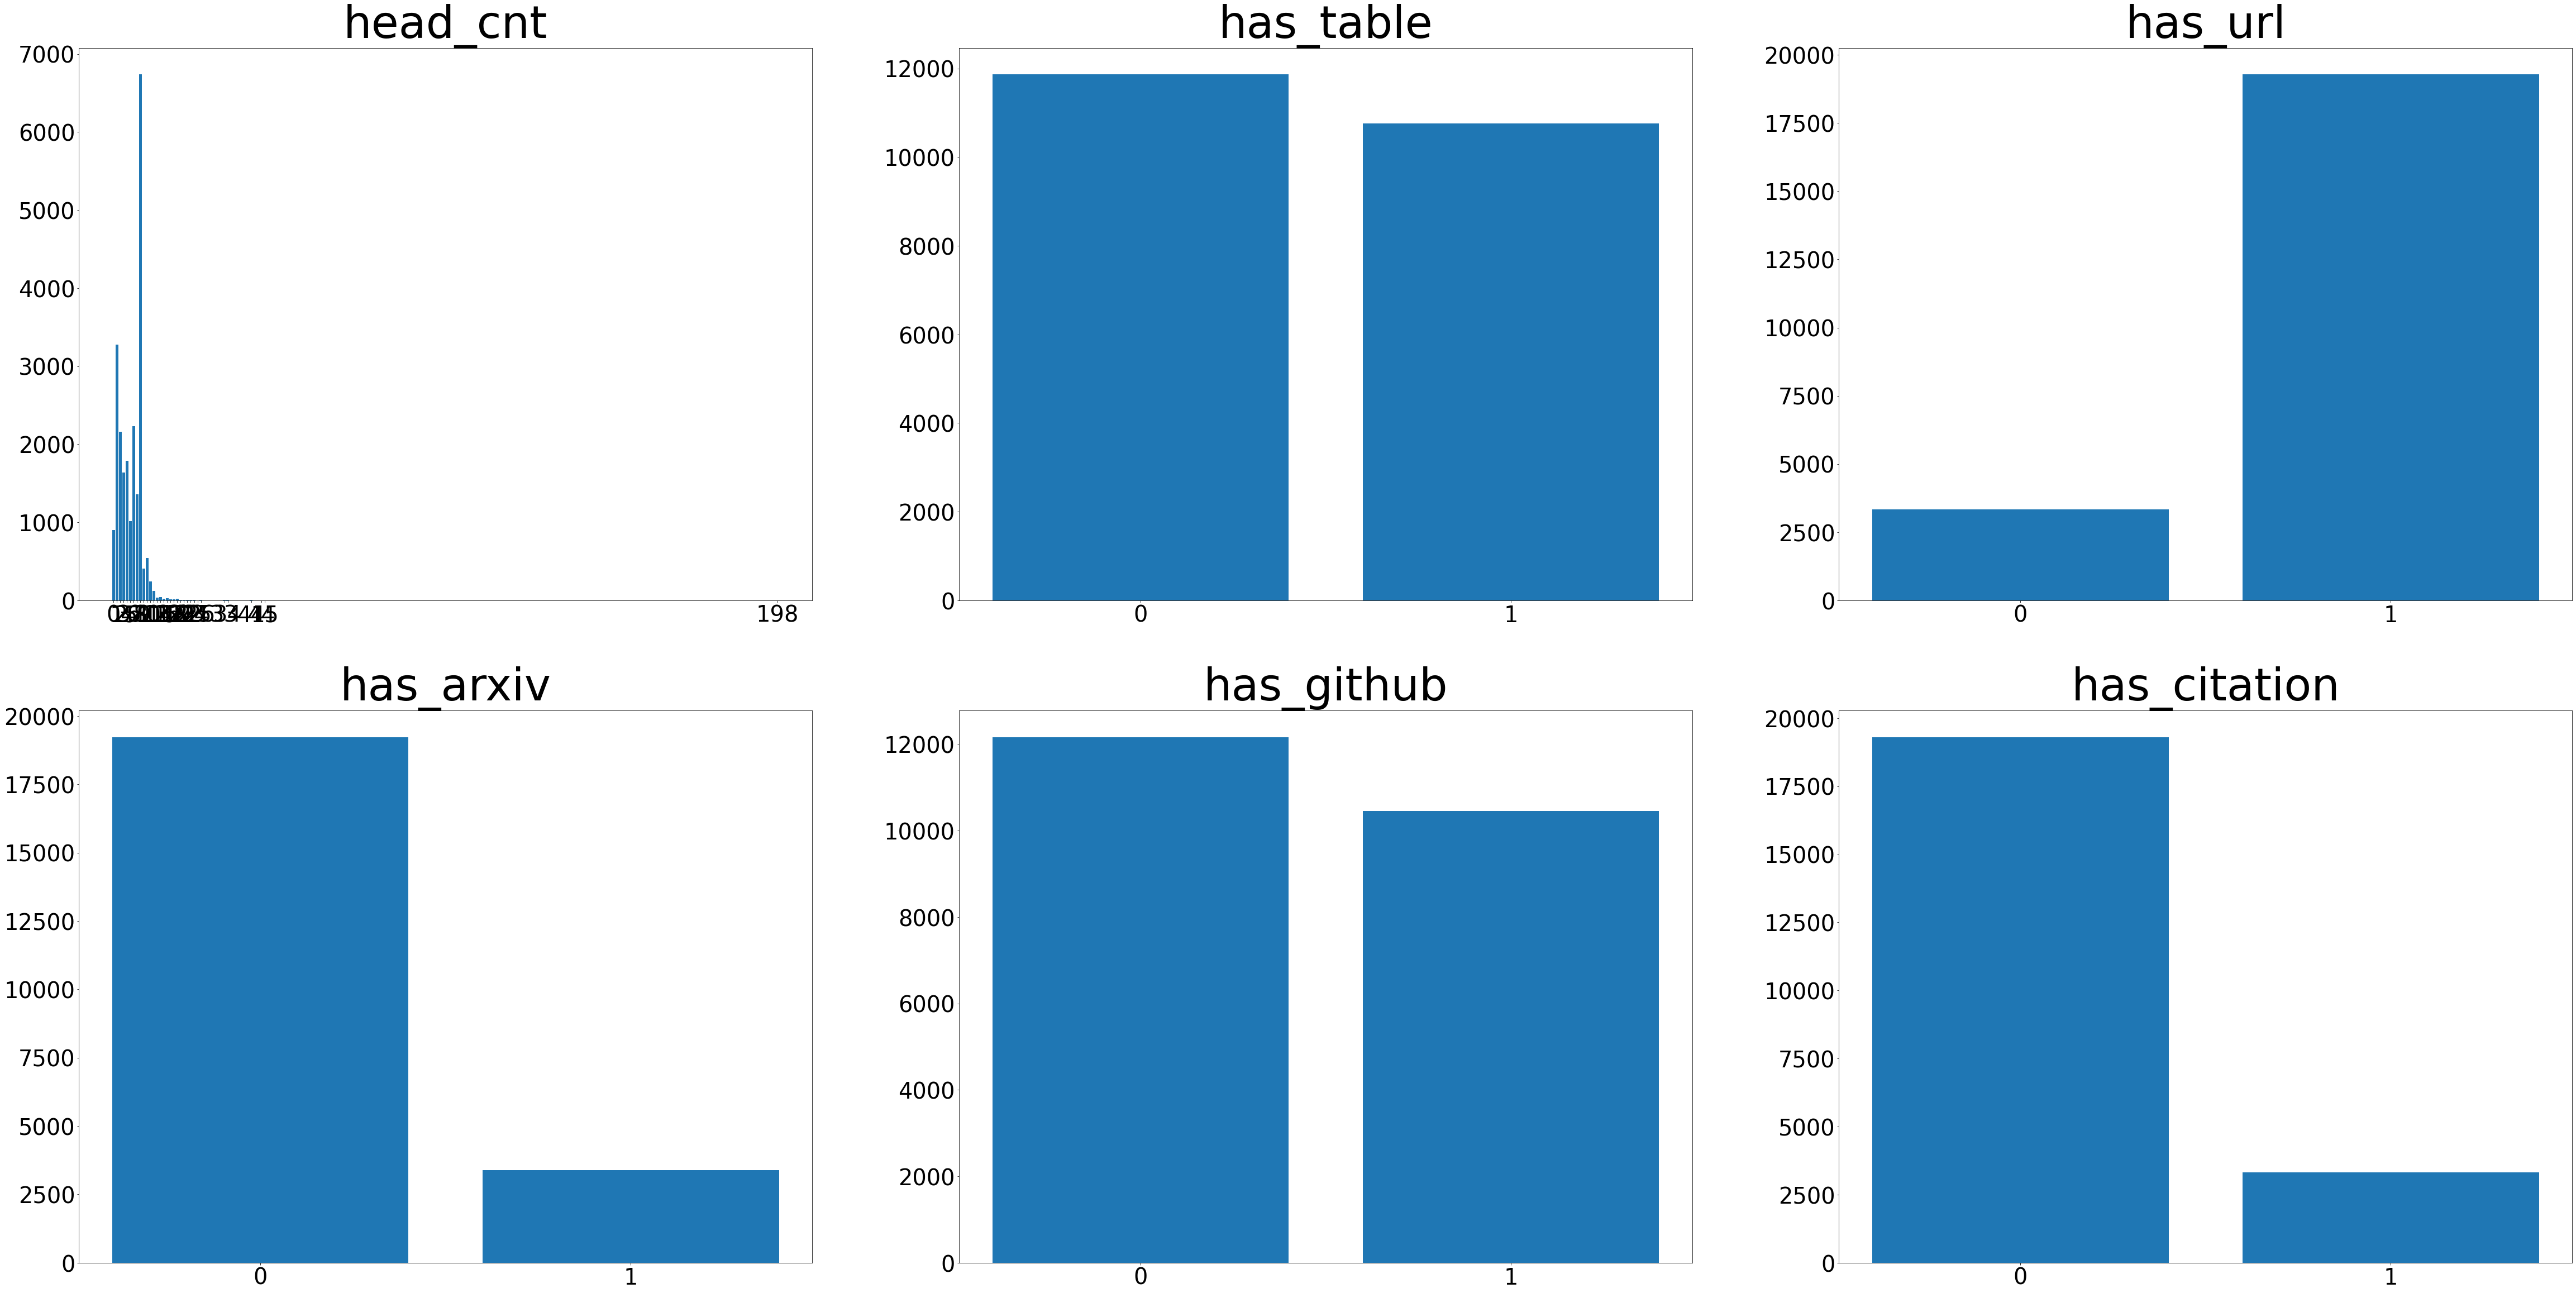

In [84]:
plt.figure(figsize=(80,40))
index = 1
for info in unstructured_info_dict.keys():
    plt.subplot(2, 3, index)
    x = sorted(list(set(unstructured_info_dict[info])))
    plt.bar(x, [unstructured_info_dict[info].count(i) for i in x])
    plt.xticks(x, fontsize=40)
    plt.yticks(fontsize=40)
    plt.title(info, fontsize=80)
    index += 1

plt.show()

# Linear regression

In [87]:
# structured information
"""
language: 'en', 'zh', 'other', 'None'
license: 'apache-2.0', 'mit', 'other', 'None'
tags: 'generated_from_trainer', 'other', 'None'
"""
categories = {
    'language': ['en', 'zh', 'other', 'None'],
    'license': ['apache-2.0', 'mit', 'other', 'None'],
    'tags': ['image-classification', 'question-answering', 'text-classification', 
             'text-generation', 'translation', 'other', 'None'],
}

columns = []
columns.append('wordcount')
for i in categories.keys():
    for j in categories[i]:
        columns.append(i + ':' + j)
columns.append('has_dataset')

# unstructured information
columns.append('head_cnt')
for i in unstructured_info[1:]:
    columns.append(i)


columns.insert(0, 'modelId')
columns.append('downloads')

print(columns)


['modelId', 'wordcount', 'language:en', 'language:zh', 'language:other', 'language:None', 'license:apache-2.0', 'license:mit', 'license:other', 'license:None', 'tags:image-classification', 'tags:question-answering', 'tags:text-classification', 'tags:text-generation', 'tags:translation', 'tags:other', 'tags:None', 'has_dataset', 'head_cnt', 'has_table', 'has_url', 'has_arxiv', 'has_github', 'has_citation', 'downloads']


In [88]:
model_card_info_df = pd.DataFrame(columns=columns)
model_card_info_df

,modelId,wordcount,language:en,language:zh,language:other,language:None,license:apache-2.0,license:mit,license:other,license:None,tags:image-classification,tags:question-answering,tags:text-classification,tags:text-generation,tags:translation,tags:other,tags:None,has_dataset,head_cnt,has_table,has_url,has_arxiv,has_github,has_citation,downloads


In [93]:
model_card_info_df = pd.DataFrame(columns=columns)
for m, c in models_has_card.items():
    card = m.cardData
    row = []
    attr_hascnt = {}
    log_word = np.log10(count_word(c.text)) if count_word(c.text) > 0 else 0
    row.append(log_word)
    for j in columns:
        if ':' in j:
            attr, info = j.split(':')
            if info == 'None':
                if attr not in card or card[attr] == None:
                    row.append(1)
                    continue
            # print(card[attr])
            elif info == 'other' and attr in card:
                if not attr_hascnt.get(attr, False):
                    row.append(1)
                    continue
            elif attr in card and card[attr] != None:
                if info in card[attr]:
                    row.append(1)
                    attr_hascnt[attr] = True
                    continue
            row.append(0)
        elif j == 'has_dataset':
            if 'datasets' in card:
                row.append(1)
            else:
                row.append(0)
        else:
            card_unstructured_info = model_card_markdown[m]
            # if j == 'head_cnt':
            #     row.append(int(card_unstructured_info['head_cnt']>3))
            if j in unstructured_info:
                row.append(int(card_unstructured_info[j]))
                
    row.append(np.log(m.downloads))
    row.insert(0, m.modelId)
    model_card_info_df.loc[len(model_card_info_df)] = row
print(len(model_card_info_df))

22622


In [94]:
pd.set_option('display.max_rows', 20)
# model_card_info_df

,modelId,wordcount,language:en,language:zh,language:other,language:None,license:apache-2.0,license:mit,license:other,license:None,tags:image-classification,tags:question-answering,tags:text-classification,tags:text-generation,tags:translation,tags:other,tags:None,has_dataset,head_cnt,has_table,has_url,has_arxiv,has_github,has_citation,downloads
0,microsoft/deberta-base,2.146128,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,3,1,1,1,1,1,17.234863
1,bert-base-uncased,3.084934,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,11,1,1,1,1,1,17.056974
2,hfl/chinese-macbert-base,2.664642,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,3,0,1,1,1,1,17.045502
3,Jean-Baptiste/camembert-ner,2.582063,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,6,1,1,0,0,0,16.636262
4,gpt2,3.042969,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,10,1,1,0,1,1,16.240069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22617,Lvxue/distilled-mt5-small-1-0.25,2.133539,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,8,0,1,0,0,0,0.000000
22618,Lvxue/distilled-mt5-small-0.005-1,2.133539,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,8,0,1,0,0,0,0.000000
22619,Lvxue/distilled-mt5-small-1-1,2.130334,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,8,0,1,0,0,0,0.000000
22620,ricardo-filho/bert_base_tcm_0.9_10_epochs,2.961421,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,8,1,1,0,0,0,0.000000


In [95]:
model_card_info_df

,modelId,wordcount,language:en,language:zh,language:other,language:None,license:apache-2.0,license:mit,license:other,license:None,tags:image-classification,tags:question-answering,tags:text-classification,tags:text-generation,tags:translation,tags:other,tags:None,has_dataset,head_cnt,has_table,has_url,has_arxiv,has_github,has_citation,downloads
0,microsoft/deberta-base,2.146128,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,3,1,1,1,1,1,17.234863
1,bert-base-uncased,3.084934,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,11,1,1,1,1,1,17.056974
2,hfl/chinese-macbert-base,2.664642,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,3,0,1,1,1,1,17.045502
3,Jean-Baptiste/camembert-ner,2.582063,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,6,1,1,0,0,0,16.636262
4,gpt2,3.042969,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,10,1,1,0,1,1,16.240069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22617,Lvxue/distilled-mt5-small-1-0.25,2.133539,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,8,0,1,0,0,0,0.000000
22618,Lvxue/distilled-mt5-small-0.005-1,2.133539,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,8,0,1,0,0,0,0.000000
22619,Lvxue/distilled-mt5-small-1-1,2.130334,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,8,0,1,0,0,0,0.000000
22620,ricardo-filho/bert_base_tcm_0.9_10_epochs,2.961421,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,8,1,1,0,0,0,0.000000


In [96]:
# linear regression
import statsmodels.api as sm

y = model_card_info_df['downloads']
X = model_card_info_df.drop(['downloads', 'modelId'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())
print('p-values:', model.pvalues)

                            OLS Regression Results                            
Dep. Variable:              downloads   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     188.6
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:49:12   Log-Likelihood:                -51424.
No. Observations:               22622   AIC:                         1.029e+05
Df Residuals:                   22598   BIC:                         1.031e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 